In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random

In [2]:
x,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
data=pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
data['target']=y
print(data.shape)
data.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.844495,2.052596,-2.052026,-0.464132,-1.289487,0
1,0.132422,2.928870,-0.884689,-0.148731,-1.021904,0
2,-0.913752,-0.128503,-2.066823,0.150639,1.750543,1
3,-0.497404,-0.849115,0.772477,1.325164,-0.722010,1
4,-1.008400,0.289364,1.807186,-0.830949,0.950742,1


In [4]:
def sample_rows(data,percent):
    return data.sample(int(percent*data.shape[0]),replace=True)

In [5]:
def sample_features(data,percent):
    cols=random.sample(data.columns.tolist()[:-1],int(percent*(data.shape[1]-1)))
    return data[cols]

In [6]:
def combine_sampling(data,row_percent,col_percent):
    new_data=sample_rows(data,row_percent)
    return sample_features(new_data,col_percent)

In [7]:
combine_sampling(data,0.5,0.5).shape

(50, 2)

In [8]:
df_1=sample_features(data,0.8)
df_1

,col5,col1,col3,col4
0,-1.289487,1.844495,-2.052026,-0.464132
1,-1.021904,0.132422,-0.884689,-0.148731
2,1.750543,-0.913752,-2.066823,0.150639
3,-0.722010,-0.497404,0.772477,1.325164
4,0.950742,-1.008400,1.807186,-0.830949
...,...,...,...,...
95,2.116035,-1.399502,-2.758245,0.228997
96,-1.090538,1.224334,-1.250684,0.122345
97,-2.208519,-0.851118,-1.808008,-2.144227
98,-1.267685,-0.257061,0.246512,0.316581


In [9]:
df_2=sample_features(data,0.8)
df_2

,col4,col5,col2,col3
0,-0.464132,-1.289487,2.052596,-2.052026
1,-0.148731,-1.021904,2.928870,-0.884689
2,0.150639,1.750543,-0.128503,-2.066823
3,1.325164,-0.722010,-0.849115,0.772477
4,-0.830949,0.950742,0.289364,1.807186
...,...,...,...,...
95,0.228997,2.116035,-0.197302,-2.758245
96,0.122345,-1.090538,2.238727,-1.250684
97,-2.144227,-2.208519,3.155977,-1.808008
98,0.316581,-1.267685,3.938682,0.246512


In [10]:
df_3=sample_features(data,0.8)
df_3

,col1,col5,col4,col3
0,1.844495,-1.289487,-0.464132,-2.052026
1,0.132422,-1.021904,-0.148731,-0.884689
2,-0.913752,1.750543,0.150639,-2.066823
3,-0.497404,-0.722010,1.325164,0.772477
4,-1.008400,0.950742,-0.830949,1.807186
...,...,...,...,...
95,-1.399502,2.116035,0.228997,-2.758245
96,1.224334,-1.090538,0.122345,-1.250684
97,-0.851118,-2.208519,-2.144227,-1.808008
98,-0.257061,-1.267685,0.316581,0.246512


In [11]:
df1=sample_rows(data,0.1)

In [12]:
df1

,col1,col2,col3,col4,col5,target
39,-1.864445,-1.088673,-0.265389,-0.426750,0.336883,1
16,-1.410865,0.287410,-1.148296,-0.797452,0.461530,1
44,-1.355920,0.141240,-3.563134,-0.032479,2.383163,1
68,1.201140,2.402410,-1.284038,-0.374792,-1.811818,0
54,1.641641,1.481481,-1.445798,-0.749190,-0.598348,0
8,-1.431156,-0.887152,0.081873,0.003077,0.334173,1
50,-0.948428,-0.394010,-0.243349,0.434869,1.744764,1
82,-1.072712,-0.078780,-1.560960,-0.510547,0.099078,1
76,0.436413,2.646923,-1.602939,-2.014194,-1.887674,0
81,-0.483047,-1.947552,-0.090300,2.186012,0.421123,1


In [13]:
df2=sample_rows(data,0.1)

In [14]:
df3=sample_rows(data,0.1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier()
DT2=DecisionTreeClassifier()
DT3=DecisionTreeClassifier()


In [16]:
DT1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
DT2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
DT3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 0.884\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

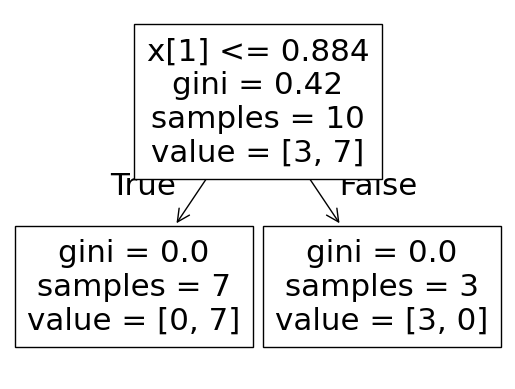

In [18]:
plot_tree(DT1)

[Text(0.5, 0.75, 'x[1] <= 0.386\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

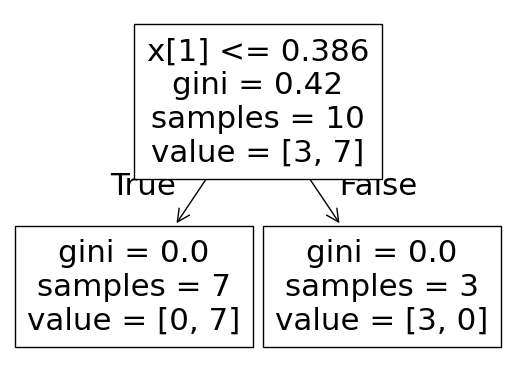

In [19]:
plot_tree(DT2)

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.543\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[3] <= 0.73\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.6666666666666667, '  False')]

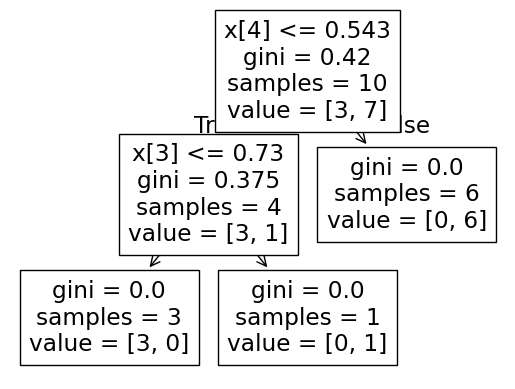

In [20]:
plot_tree(DT3)

In [21]:
DT1.predict(np.array([-0.210490,1.268935,0.544030,-0.821358,1.872229]).reshape(1,5))


C:\Users\nigam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
DT1.predict(np.array([-0.210490,1.268935,0.544030,-0.821358,1.872229]).reshape(1,5))

C:\Users\nigam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
DT1.predict(np.array([-0.210490,1.268935,0.544030,-0.821358,1.872229]).reshape(1,5))

C:\Users\nigam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])